In [204]:
import pandas as pd
import numpy as	np
import random
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [205]:
iris = datasets.load_iris()
data = iris.data
target = iris.target
n, features = data.shape

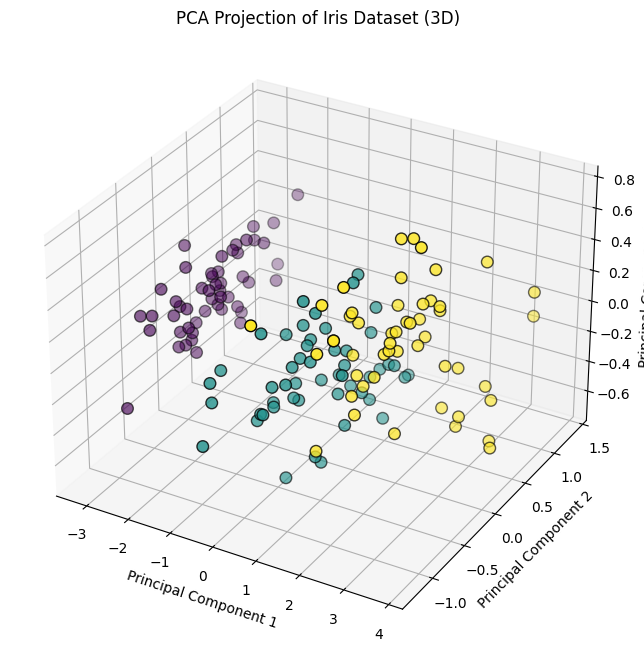

In [206]:
# Apply PCA to reduce the dimensionality to 3D
pca = PCA(n_components=3)
data_3d = pca.fit_transform(data)

# Plot the 3D projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=target, cmap='viridis', edgecolors='k', s=70)
ax.set_title('PCA Projection of Iris Dataset (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


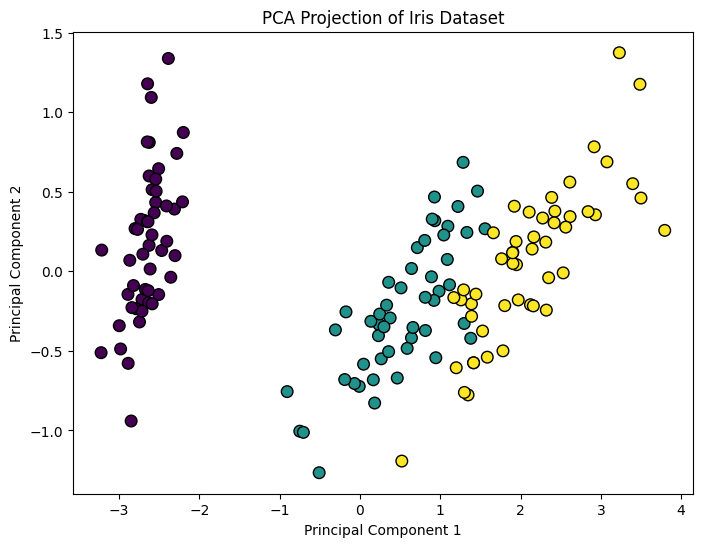

In [207]:
# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Plot the 2D projection
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=target, cmap='viridis', edgecolors='k', s=70)
plt.title('PCA Projection of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


C:\Users\aminm\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


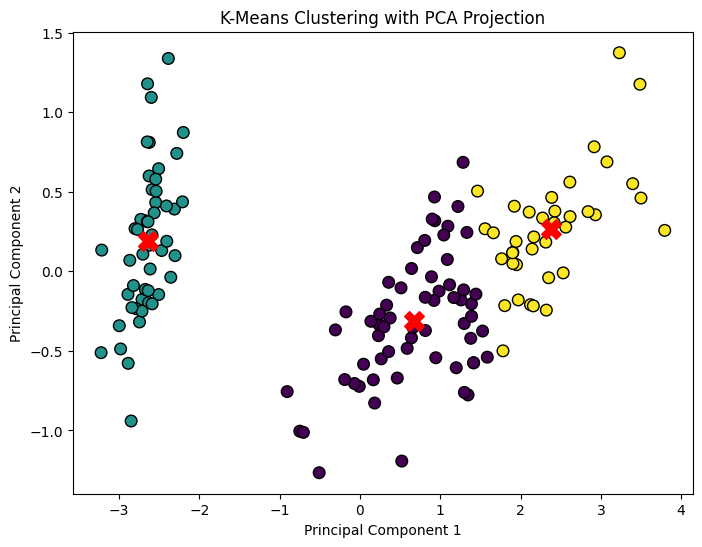

In [208]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans.labels_, cmap='viridis', edgecolors='k', s=70)
plt.title('K-Means Clustering with PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
centers_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.show()


population

In [209]:
def initialize_population():
    population = []
    for i in range(200):
        n = random.randint(1, 3)
        population.append(np.random.randint(0, n, size=(151)))
        population[i][150] = n
    return population

mutation

In [210]:
def mutation(child):
    rand = random.randint(0, 149)
    child[rand] = np.random.randint(0, child[150])
    return child

cross-over

In [211]:
def crossover(parent1, parent2):
    child1 = []
    child2 = []
    for i in range(0, 151):
        if random.random() < 0.5:
            child1.append(parent1[i])
        else:
            child1.append(parent2[i])
        if random.random() < 0.5:
            child2.append(parent1[i])
        else:
            child2.append(parent2[i])
    
    return np.array(child1), np.array(child2)

fitness

In [212]:
def calculate_distance(data, cluster):
    mean = np.mean(cluster, axis=0)
    distance = np.abs(cluster - mean)
    distance = np.sum(distance, axis=1)
    distance = np.sum(distance)
    return distance

def fitness_(data, gen):
    num_clusters = int(gen[150])
    gen = gen[:150]
    total_distance = 0

    for i in range(num_clusters):
        mask = np.where(gen != i)
        cluster = np.delete(data, mask, 0)
        total_distance += calculate_distance(data, cluster)

    return total_distance


selection


In [213]:
def selcetion(population, mutation_rate):
    population = population[0:50]
    childs = []
    for i in range(len(population)):
        for j in range(i, len(population)):
            if population[i][150] == population[j][150] and i != j:
                child1, child2 = crossover(population[i], population[j])
                if random.random() < mutation_rate:
                    child1 = mutation(child1)
                childs.append(child1)
                if random.random() < mutation_rate:
                    child2 = mutation(child2)
                childs.append(child2)

    childs = np.array(childs)
    population = population[:, 0:151]
    population = np.concatenate((population, childs), axis=0)
    return population

genetic

In [214]:
def genetic_algorithm(population, data, num_generations):
    fitness = []
    for i in range(len(population)):
        fitness.append(fitness_(data, population[i]))
    fitness = np.array(fitness)
    population = np.array(population)
    fitness = np.reshape(fitness, (len(population), 1))
    population = np.concatenate((population, fitness), axis=1)
    population = population[population[:, 151].argsort()]

    if num_generations in [0,1,2,5,10,25,50,100,150]:
        print(f'Generation :{num_generations}, Best fitness: {population[0][151]}, Mean fitness: {np.mean(population[:, 151])}')
        
    population = selcetion(population, 0.01)
    return population

In [215]:
population = initialize_population()
for i in range(151):
    population = genetic_algorithm(population, data, i)

Generation :0, Best fitness: 466.3149792913024, Mean fitness: 484.0080369443725
Generation :1, Best fitness: 451.90419715055833, Mean fitness: 480.0195867476418
Generation :2, Best fitness: 426.842337164751, Mean fitness: 471.1571314404617
Generation :5, Best fitness: 311.9180102915952, Mean fitness: 367.33517777627884
Generation :10, Best fitness: 207.09538140837728, Mean fitness: 218.6009971757153
Generation :25, Best fitness: 170.76542489299425, Mean fitness: 171.9252938373798
Generation :50, Best fitness: 166.74162637362636, Mean fitness: 166.7803090736156
Generation :100, Best fitness: 162.17187816387812, Mean fitness: 162.19731415148917
Generation :150, Best fitness: 162.17187816387812, Mean fitness: 162.20274067677184


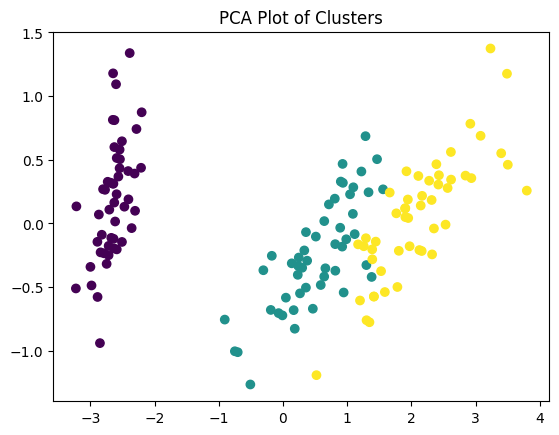

In [216]:
reduced_data = pca.fit_transform(data)
df = pd.DataFrame({'PC1': reduced_data[:, 0], 'PC2': reduced_data[:, 1], 'Cluster': target})
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis')
plt.title('PCA Plot of Clusters')
plt.show()